# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('/home/manoj/Documents/Hackathon/HeartDisease_dataset.csv')

In [3]:
# Understanding about the features/attributes
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

we have 14 features where 13 are independent and 1 is dependent variable.

Data Description
1. age: age in years
2. sex: sex (male;female)
3. cp: chest pain type
    1. typical angina
    2. atypical angina
    3. non-anginal pain
    4.  asymptomatic
4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
7. restecg: resting electrocardiographic results
    1. normal
    2. having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    3. showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    1. upsloping
    2. flat
    3. downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. condition

In [4]:
df.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [5]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [6]:
df_final = df.drop('target',axis=1)
y = df['target']

In [7]:
from sklearn.model_selection import train_test_split
df_train,X_test,y_train,y_test = train_test_split(
    df,y,test_size=0.2,stratify=df['target'],random_state=42)

# Exploratory Data Analysis

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers 

In [8]:
df
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


There are a variety of descriptive statistics. Numbers such as the mean, median, mode, skewness, kurtosis, standard deviation, first quartile and third quartile, to name a few, each tell us something about our data.

1. The minimum – this is the smallest value in our data set.
2. The first quartile – this number is denoted Q1 and 25% of our data falls below the first quartile.
3. The median – this is the midway point of the data. 50% of all data falls below the median.
4. The third quartile – this number is denoted Q3 and 75% of our data falls below the third quartile.
5. The maximum – this is the largest value in our data set.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholestoral'}>,
        <AxesSubplot:title={'center':'Max_heart_rate'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

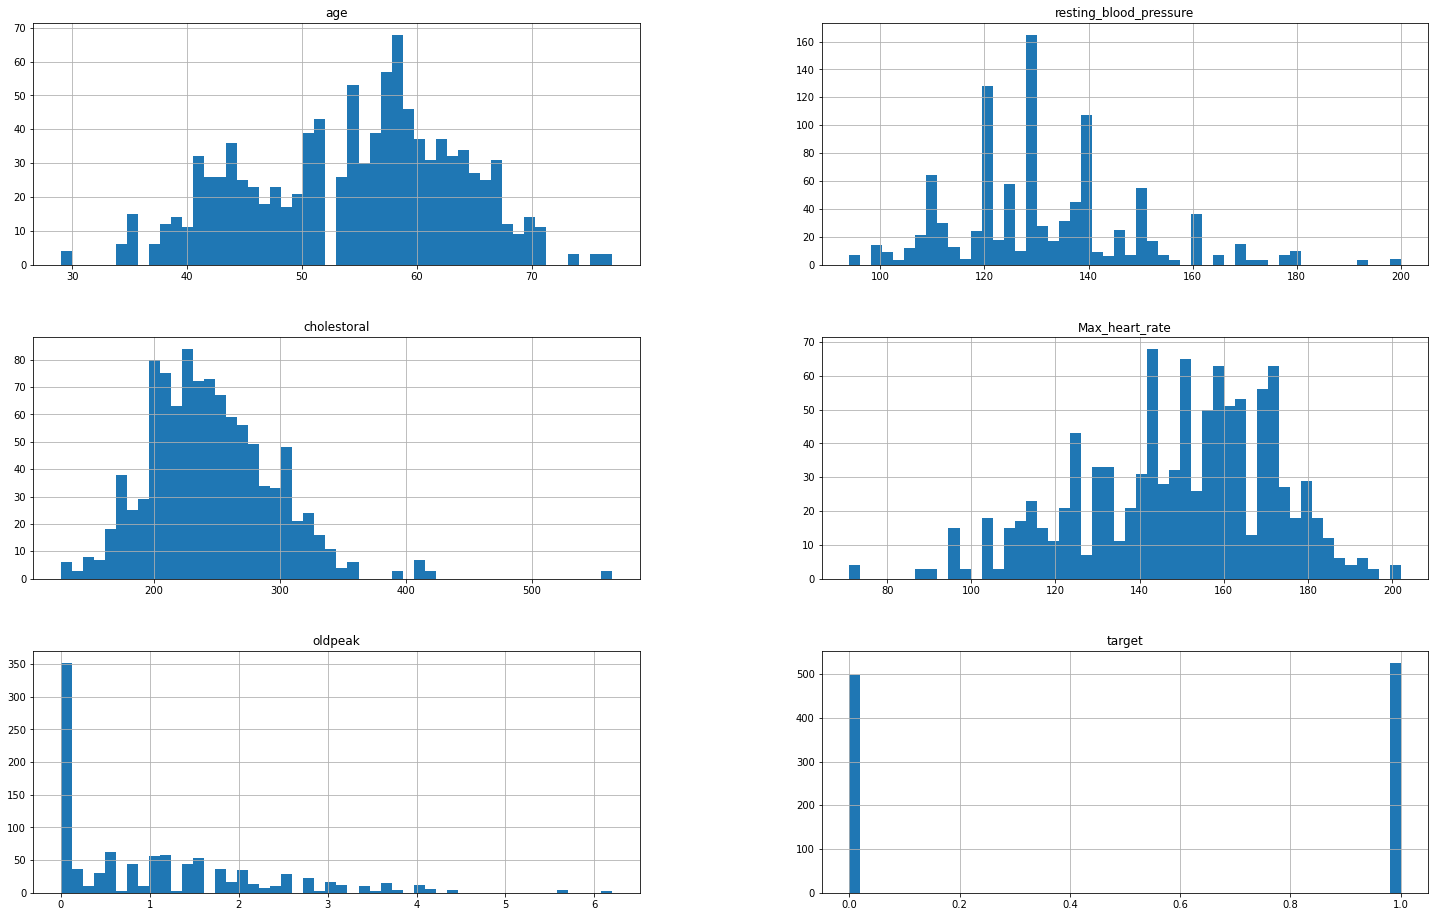

In [9]:
df.hist(bins=50,figsize=(25,16))

A histogram is one of the most frequently used data visualization techniques in machine learning. It represents the distribution of a continuous variable over a given interval or period of time. Histograms plot the data by dividing it into intervals called ‘bins’.

# Visualizing Outliers

An outlier is an object that deviates significantly from the rest of the objects. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.

<AxesSubplot:xlabel='target', ylabel='age'>

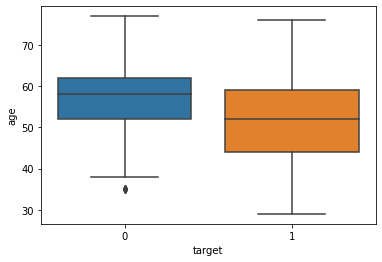

In [10]:
import seaborn as sns
sns.boxplot(x='target', y='age', data=df)
# condition vs age

<AxesSubplot:xlabel='target', ylabel='resting_blood_pressure'>

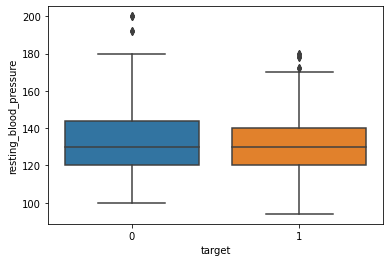

In [11]:
# condition vs trestbps
sns.boxplot(x="target", y="resting_blood_pressure", data=df)

<AxesSubplot:xlabel='target', ylabel='cholestoral'>

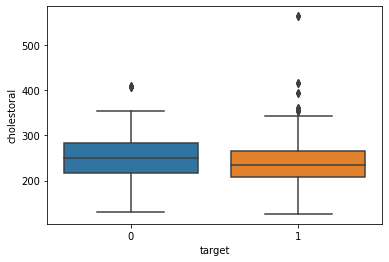

In [12]:
# condition vs trestbps
sns.boxplot(x="target", y="cholestoral", data=df)

<AxesSubplot:xlabel='target', ylabel='Max_heart_rate'>

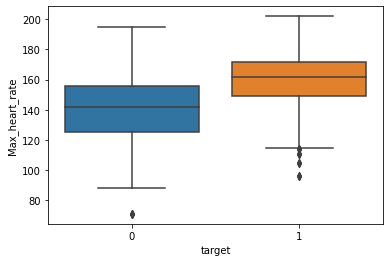

In [13]:
# condition vs trestbps
sns.boxplot(x="target", y="Max_heart_rate", data=df)

We can see in the above figures there is some outliers in the features. so, we have to take care of that. However there are some algorithm which can handle the outlier.

# Looking at unique value in our data

In [14]:
df['chest_pain_type'].value_counts()

Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: chest_pain_type, dtype: int64

Number of Typical angina is 497, number of Non-anginal pain is 284, number of Atypical angina is 167, and number of asymptomatic is 77


In [15]:
df['rest_ecg'].value_counts()

ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: rest_ecg, dtype: int64

Total number of restecg normal is 497, having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) is 513,showing probable or definite left ventricular hypertrophy by Estes' criteria is 15

In [16]:
df['slope'].value_counts()

Flat           482
Downsloping    469
Upsloping       74
Name: slope, dtype: int64

 Number of upsloping is 139, number of flat slope is 137 and number of downsloping is 21

# Handling Missing/Null Values

We can find the total number of missing value in each feature using pandas function.

In [17]:
df.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

<AxesSubplot:>

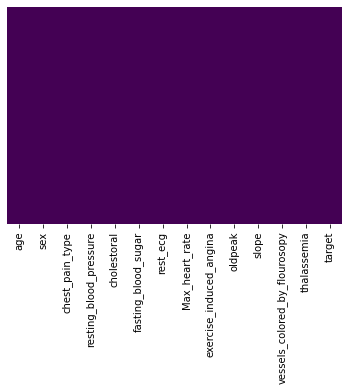

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can see there is no missing values

# Handling the Imbalance Data

Let’s look at the percentage of each class in dataset

In [19]:
df['target'].value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

<AxesSubplot:>

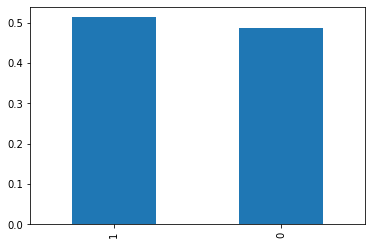

In [20]:
df['target'].value_counts(normalize=True).plot.bar()

# Features Selection

 Feature Selection is the process to automatically select those features which contribute most to our model

In [21]:
df1 = df[['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak','target']]

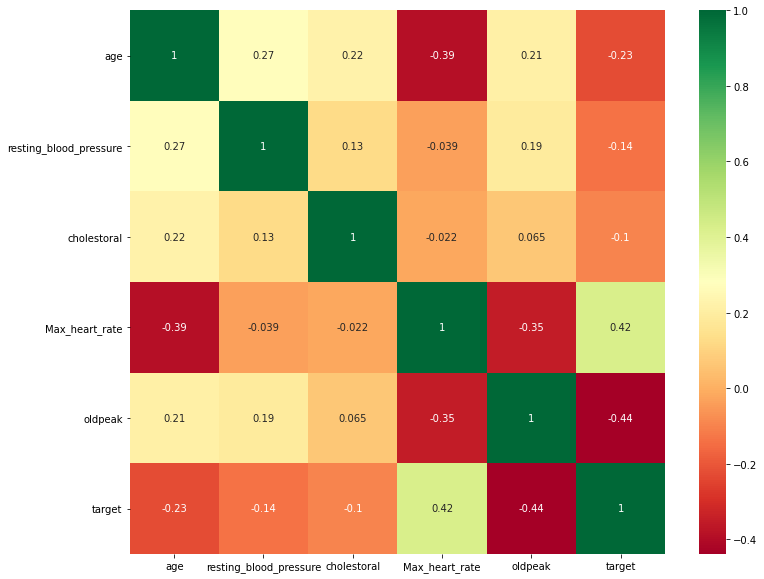

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn')
plt.show()

We see our most of the features are not highly correlated with each others. we can see thalach is not correlated with other features and thal is correlated with target variable

# Calculating vif to remove multicollinearity

We can find the VIF of respective feature and remove the feature having VIF greater than 10. VIF score of an independent variable represents how well the variable is explained by other independent variables. VIF is calculated by keeping one independent variable as dependent and other independent variable 

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df1.values,i) for i in range (df1.shape[1])]
for i in range(0,5):
    print("The Vif for {} is {}".format(df1.columns[i],vif[i]))

The Vif for age is 36.224179422520145
The Vif for resting_blood_pressure is 55.531907211395136
The Vif for cholestoral is 24.449787894485482
The Vif for Max_heart_rate is 35.01427483090798
The Vif for oldpeak is 2.3814914056180845


# Converting Categorical features into numerical features

In [24]:
One_hot = pd.get_dummies(df[['sex', 'chest_pain_type', 'exercise_induced_angina', 'fasting_blood_sugar', 'rest_ecg', 'slope', 'thalassemia', 'vessels_colored_by_flourosopy']],drop_first=True)
One_hot.head()


,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,exercise_induced_angina_Yes,fasting_blood_sugar_Lower than 120 mg/ml,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero
0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
2,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1
3,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0
4,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0


In [25]:
X = df[['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak']]

In [26]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])


In [27]:
df_final_feature = pd.concat([df[columns_to_scale],One_hot],axis=1)

In [28]:
# df_final_feature = pd.concat([X,One_hot],axis=1)

In [29]:
pd.set_option('display.max_columns',None)
df_final_feature.head()


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,exercise_induced_angina_Yes,fasting_blood_sugar_Lower than 120 mg/ml,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0


In [30]:
y = df['target']

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(criterion='entropy',max_depth=5)
model.fit(df_final_feature,y)

ExtraTreesClassifier(criterion='entropy', max_depth=5)

In [32]:
print(model.feature_importances_)

[0.01902781 0.01045729 0.01168102 0.03368422 0.04724881 0.04460072
 0.01311138 0.04012306 0.18244586 0.11151434 0.01080076 0.01368551
 0.01301286 0.06497239 0.00914645 0.0007162  0.00890551 0.14907253
 0.02492003 0.01605167 0.03389666 0.14092492]


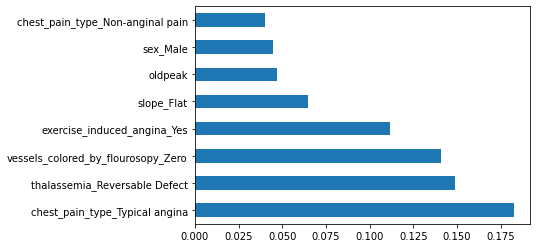

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_final_feature.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

# Splitting the data

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    df_final_feature,y,test_size=0.2,stratify=df['target'],random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [36]:
scale_x_train = pd.DataFrame(
    standardScaler.fit_transform(X_train),
    columns = X_train.columns
)

In [37]:
scale_x_test = pd.DataFrame(
    standardScaler.transform(X_test),
      columns = X_test.columns
)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(scale_x_train,y_train)
y_pred=rf_classifier.predict(scale_x_test)

In [40]:
from sklearn.tree import DecisionTreeClassifier
clss = DecisionTreeClassifier().fit(scale_x_train,y_train)
y_pred=clss.predict(scale_x_test)

<AxesSubplot:>

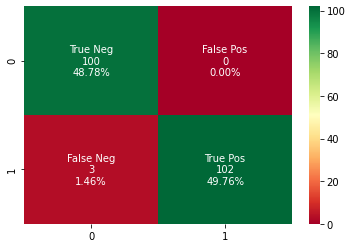

In [41]:
from sklearn.metrics import confusion_matrix
# y_pred = rf_classifier.predict(scale_x_test)
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

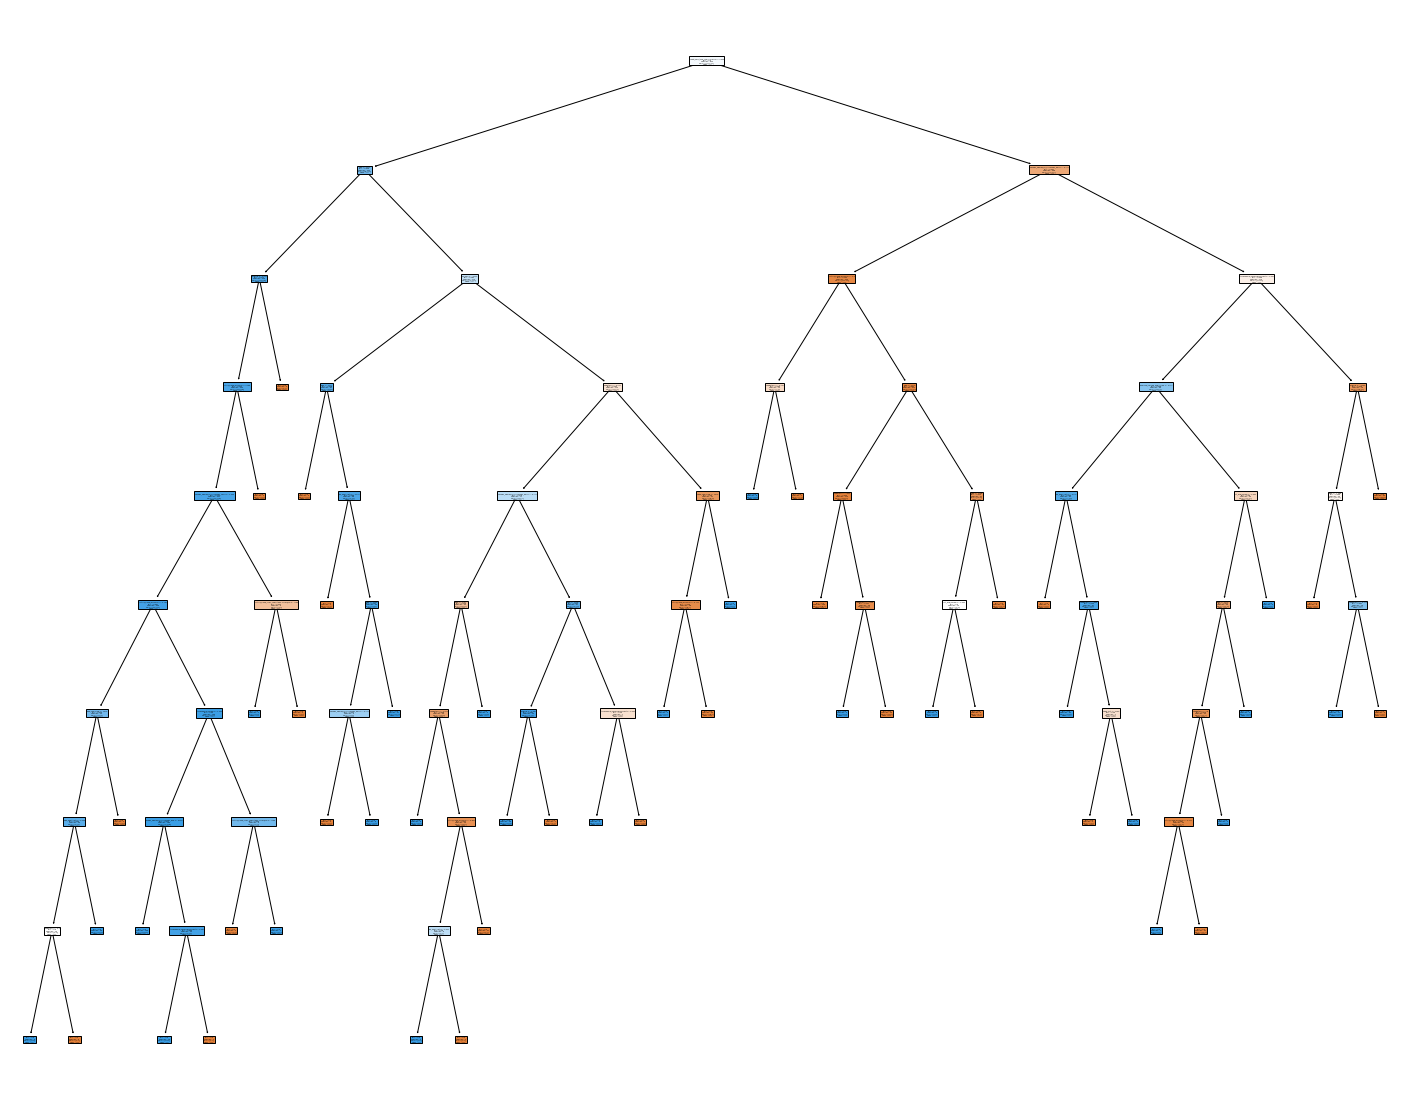

In [42]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clss, 
                   feature_names=df_final_feature.columns,  
                   class_names=['yes','no'],
                   filled=True)

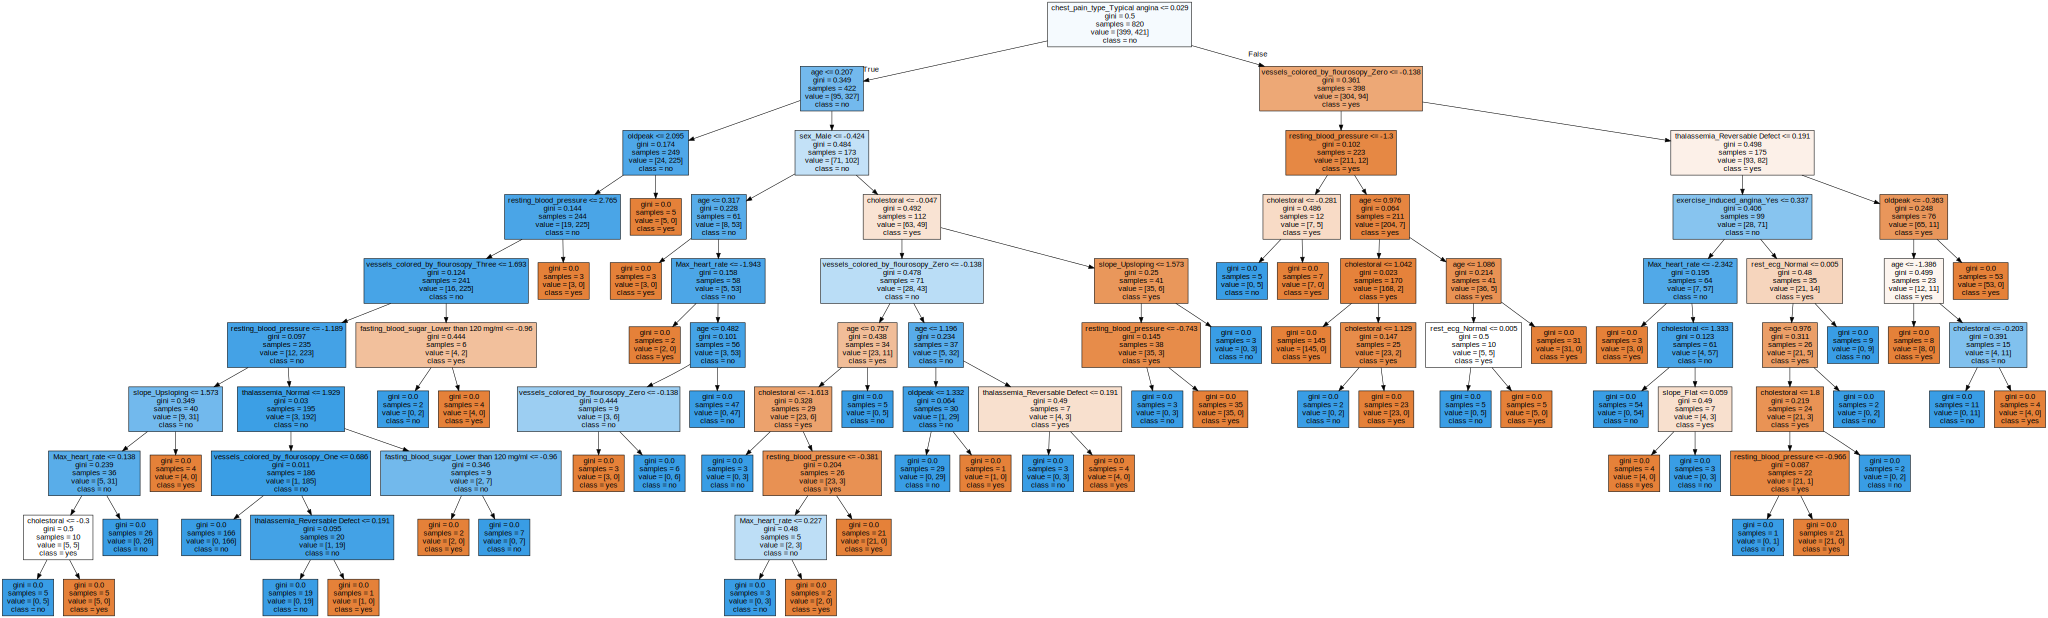

In [43]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clss, out_file=None, 
                                feature_names=df_final_feature.columns,  
                                class_names=['yes','no'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph

<AxesSubplot:>

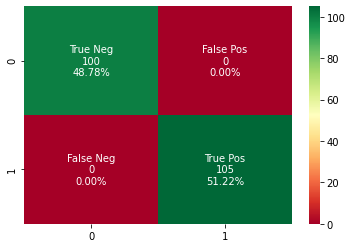

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = rf_classifier.predict(scale_x_test)
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

In [45]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}


In [46]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(scale_x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [47]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [48]:
rf_classifier=RandomForestClassifier(n_estimators= 600,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 890,criterion= 'entropy').fit(scale_x_train,y_train)
y_pred=rf_classifier.predict(X_test)

<AxesSubplot:>

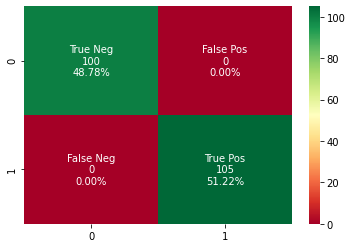

In [49]:
from sklearn.metrics import confusion_matrix
y_pred = rf_classifier.predict(scale_x_test)
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

# Xgboost Classifier

In [50]:
import xgboost

In [51]:
xgb_classifier=xgboost.XGBClassifier()

<AxesSubplot:>

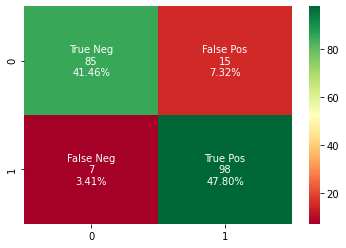

In [52]:
xgb_classifier.fit(scale_x_train,y_train)
y_pred = xgb_classifier.predict(X_test)

cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

In [53]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [54]:
random_search=RandomizedSearchCV(xgb_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [55]:
random_search.fit(scale_x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [56]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [57]:
xgb_classifier=xgboost.XGBClassifier(min_child_weight=5,max_depth=10,learning_rate=0.15,gamma=0.4,colsample_bytree=0.5)

In [58]:
xgb_classifier.fit(scale_x_train,y_train)
y_pred = xgb_classifier.predict(X_test)

<AxesSubplot:>

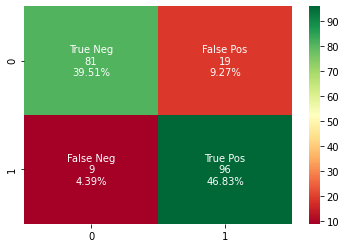

In [59]:
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

# K Neighbors Classifier

<AxesSubplot:>

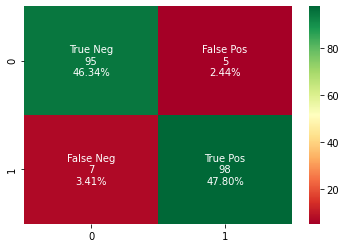

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 1).fit(scale_x_train,y_train)
y_pred = knn_classifier.predict(X_test)

cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')


In [61]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,df_final_feature,y,cv=10)
    knn_scores.append(score.mean())


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

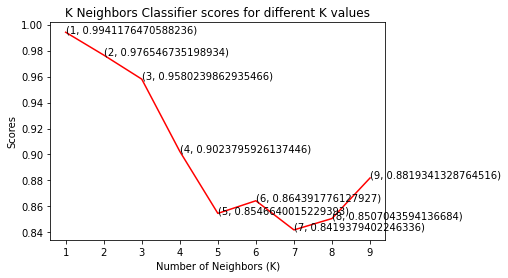

In [62]:
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [63]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
knn_classifier.fit(scale_x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

<AxesSubplot:>

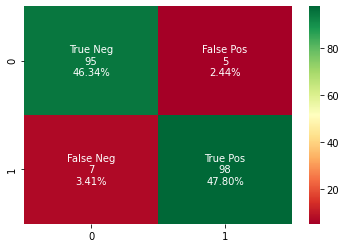

[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   5.1s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   3.6s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   4.4s
[CV] END criterion=entropy, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=800; total time=   2.1s
[CV] END criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END criterio

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   5.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   3.6s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   2.6s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.1s
[CV] END criterion=gini, ma

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   5.1s
[CV] END criterion=gini, max_depth=670, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   1.0s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, ma

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   5.3s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   2.1s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1600; total time=   4.0s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END criterion=gini, 

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

In [64]:
from sklearn.metrics import confusion_matrix
y_pred = knn_classifier.predict(X_test)
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')
